In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

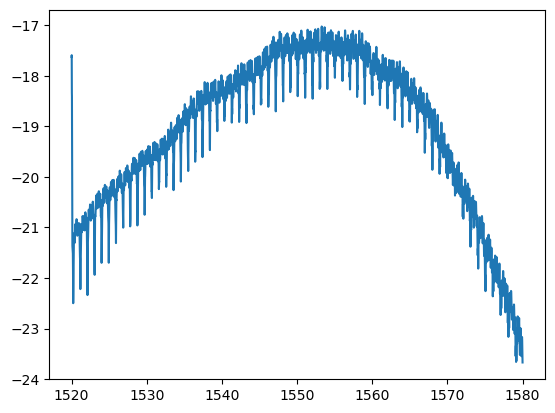

In [2]:
data_analyse_file="sg_rr_100_027 2023-12-08 17-44-55.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

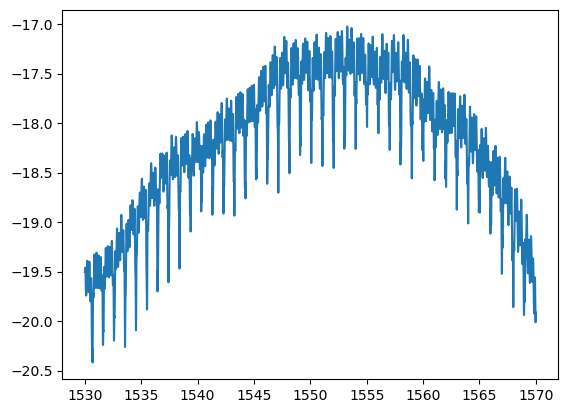

1530.0
1570.0


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

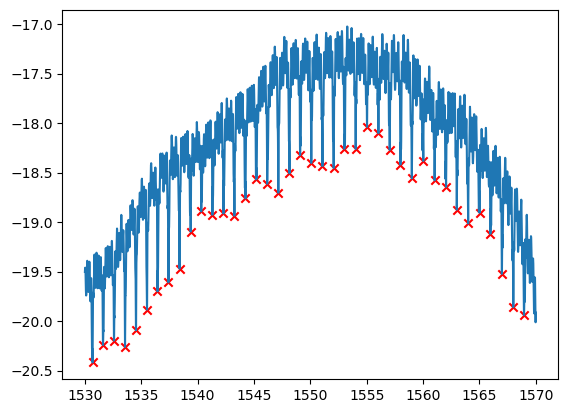

40
[1530.68, 1531.61, 1532.58, 1533.56, 1534.53, 1535.51, 1536.44, 1537.41, 1538.4, 1539.38, 1540.32, 1541.31, 1542.29, 1543.26, 1544.24, 1545.18, 1546.17, 1547.16, 1548.15, 1549.09, 1550.08, 1551.07, 1552.07, 1553.01, 1554.02, 1555.03, 1556.04, 1557.04, 1557.99, 1559.0, 1560.02, 1561.02, 1562.04, 1562.99, 1564.0, 1565.02, 1565.97, 1566.99, 1568.0, 1568.96]


In [4]:
wvlen_step_size=0.01
approx_fsr=1
promin_use=0.5
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for sanity check
print(peak_wavelens)#sanity check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[0.93 0.97 0.98 0.97 0.98 0.93 0.97 0.99 0.98 0.94 0.99 0.98 0.97 0.98
 0.94 0.99 0.99 0.99 0.94 0.99 0.99 1.   0.94 1.01 1.01 1.01 1.   0.95
 1.01 1.02 1.   1.02 0.95 1.01 1.02 0.95 1.02 1.01 0.96]
0.9815384615384608
0.004385881863638828


Now to calculate peak widths below:

[0.11056601 0.10705793 0.11170526 0.10785633 0.10259374 0.10206625
 0.10727863 0.10720865 0.11616714 0.11832611 0.11094553 0.11050847
 0.12947751 0.11809681 0.11987829 0.12043883 0.1230117  0.1641422
 0.11481314 0.12078455 0.1163479  0.1958156  0.12402292 0.12647383
 0.11769694 0.15650153 0.12590746 0.12192238 0.12650869 0.18531242
 0.1416751  0.1206975  0.12260719 0.12672106 0.14351244 0.1375789
 0.12659182 0.13041465 0.14152653 0.14214998]


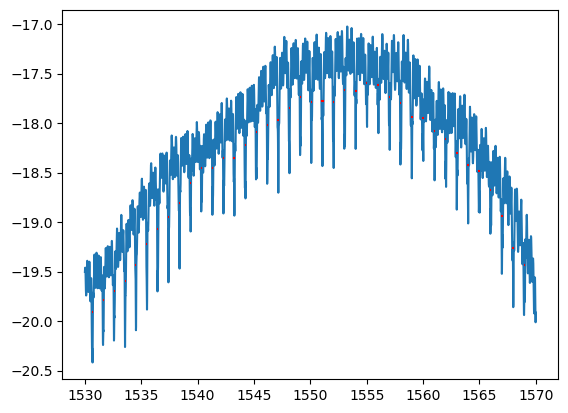

In [6]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [7]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)


0.12632269817027994
0.0032111503732971097
